In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
import librosa
import librosa.display
import glob
import os
import shutil
import random

In [7]:
# Splitting the dataset into training and testing splits
wavs = glob.glob("/content/drive/MyDrive/train_data_real/class_E/*.wav")
print(f"Number of audio files: {len(wavs)}")

# Mapper function for loading the audio. This function returns two instances of the wave
def preprocess(filename):
    data, fs = librosa.load(filename,sr=52734)
    data=librosa.effects.preemphasis(data, coef=0.97)
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=52734, n_mels=128, fmax=8192)
    mel=librosa.power_to_db(mel_spectrogram, ref=np.max)
    mean_db = np.mean(mel)
    std_db = np.std(mel)
    normalized_mel= ((mel - mean_db) / std_db) * 0.5


    return normalized_mel

data_mel = list(map(preprocess,wavs))

Number of audio files: 382


In [ ]:
folder_75_path = '/content/drive/MyDrive/Train_mel/gen'
folder_25_path = '/content/drive/MyDrive/Test_mel/gen'

# Sort the images based on their specific name format
random.shuffle(data_mel)
split_index = int(0.75 * len(data_mel))

train_list = data_mel[:split_index]
test_list = data_mel[split_index:]


for idx, spectrogram in enumerate(train_list):
    output_path = os.path.join(folder_75_path, f"Class_05_{idx + 1}.npy")
    np.save(output_path, spectrogram)

for idx, spectrogram in enumerate(test_list):
    output_path = os.path.join(folder_25_path, f"Class_05_{idx + 1}.npy")
    np.save(output_path, spectrogram)

In [ ]:
np.std(data_mel[0])

0.5

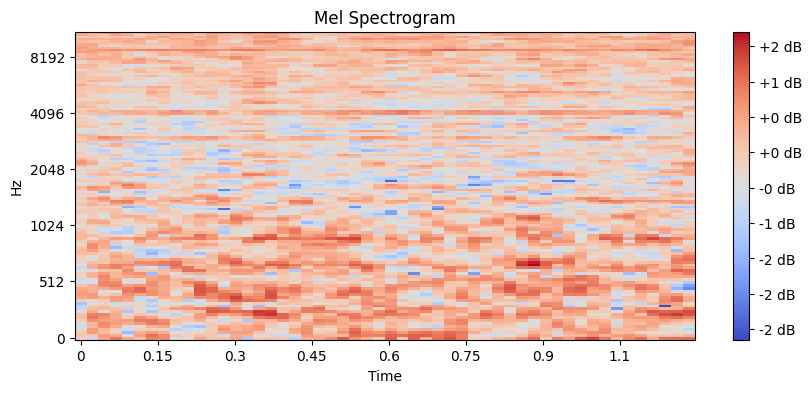

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(data_mel[0], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
